In [1]:
import os

In [4]:
##tools
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper


ARXIV TOLS

In [5]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arvix papers")

In [6]:
arxiv.invoke("Attention all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

WIKIPEDIA TOOLS

In [7]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki, description="")
wiki.name

'wikipedia'

In [9]:
wiki.invoke("salman khan 2025 movies")

'Page: Sikandar (2025 film)\nSummary: Sikandar is a 2025 Indian Hindi-language action drama film written and directed by A. R. Murugadoss and produced by Sajid Nadiadwala. It stars Salman Khan, Rashmika Mandanna, Sathyaraj, Kajal Aggarwal, Sharman Joshi, Prateik Babbar, Kishore, Jatin Sarna and Sanjay Kapoor. In the film, Salman khan plays in titular role as Sanjay "Sikandar" Rajkot. (Khan) is hunted by a politician seeking revenge for a family tragedy.\nSikandar was officially announced in April 2'

IMPORT API KEYS

In [11]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")
os.environ['TAVILY_API_KEY'] = os.getenv("TAVILY_API_KEY")

TAVILY TOOLS

In [12]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

In [13]:
tavily.invoke("provide me the recent ai news")

[{'title': 'Artificial Intelligence News - ScienceDaily',
  'url': 'https://www.sciencedaily.com/news/computers_math/artificial_intelligence/',
  'content': 'Wednesday, February 19, 2025\n\nThursday, February 13, 2025\n\nMonday, February 10, 2025\n\nMonday, February 3, 2025\n\nWednesday, January 29, 2025\n\nTuesday, January 28, 2025\n\nMonday, January 27, 2025\n\nTuesday, January 21, 2025\n\nThursday, January 16, 2025\n\nWednesday, January 15, 2025\n\nTuesday, January 14, 2025\n\nThursday, January 9, 2025\n\nWednesday, January 8, 2025\n\nMonday, January 6, 2025\n\nThursday, January 2, 2025\n\nFriday, December 27, 2024\n\nThursday, December 26, 2024\n\nThursday, December 19, 2024 [...] Artificial Intelligence News\n\nTop Headlines\n\nLatest Headlines\n\nEarlier Headlines\n\nTuesday, April 8, 2025\n\nThursday, April 3, 2025\n\nThursday, March 27, 2025\n\nWednesday, March 26, 2025\n\nTuesday, March 25, 2025\n\nWednesday, March 19, 2025\n\nTuesday, March 18, 2025\n\nMonday, March 17, 2025\

#COMBINE ALL THE TOOLS


In [14]:
tools = [arxiv, wiki, tavily]

INITIALIZE LLM MODEL

In [15]:
from langchain_groq import ChatGroq
llm= ChatGroq(
    model = "qwen-qwq-32b"
)

In [16]:
llm.invoke("hi")

AIMessage(content='\n<think>\nOkay, the user just said "hi". I should respond in a friendly way. Let me think of a simple greeting. Maybe "Hello! How can I assist you today?" That sounds good. It\'s welcoming and opens the door for them to ask for help. I\'ll go with that.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 11, 'total_tokens': 83, 'completion_time': 0.177083401, 'prompt_time': 0.002892115, 'queue_time': 0.24837764799999998, 'total_time': 0.179975516}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'stop', 'logprobs': None}, id='run--76ec6c46-188d-4f3b-ad6c-78a90a429930-0', usage_metadata={'input_tokens': 11, 'output_tokens': 72, 'total_tokens': 83})

BIND LLM WITH TOOLS

In [17]:
llm_with_tools = llm.bind_tools(tools = tools)

In [20]:
result = llm_with_tools.invoke("what is the latest research on quantum computing?")
print(result)

content='' additional_kwargs={'tool_calls': [{'id': 'call_khfb', 'function': {'arguments': '{"query": "quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 206, 'prompt_tokens': 328, 'total_tokens': 534, 'completion_time': 0.46560529, 'prompt_time': 0.021196804, 'queue_time': 0.5415005039999999, 'total_time': 0.486802094}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None} id='run--3dcd1ab1-f301-4359-9f96-f1462fa50690-0' tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_khfb', 'type': 'tool_call'}] usage_metadata={'input_tokens': 328, 'output_tokens': 206, 'total_tokens': 534}


WORKFLOW

In [22]:
##state schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage # HUman message or Ai message
from typing import Annotated #labeling
from langgraph.graph.message import add_messages ##reducers in langgraph

In [43]:
class State(TypedDict):
    messages:Annotated[list[AnyMessage], add_messages]

In [44]:
## ENtire Chatbot With Langraph
from langgraph.graph import StateGraph, START,END
from langgraph.prebuilt import ToolNode #if llm calling whats path do i need to take , if llm not calling the tool what path do i need to take
from langgraph.prebuilt import tools_condition
from IPython.display import display, Image

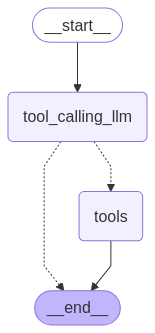

In [45]:
### NODE definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

#build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

#add edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    #if the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # if the latest mesaage (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
    )
builder.add_edge("tools", END)

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [46]:
from langchain_core.messages import HumanMessage
messages = graph.invoke({"messages":[HumanMessage(content="Hi i am murugan")]})
for i in messages['messages']:
    i.pretty_print() 

================================ Human Message =================================

Hi i am murugan
================================== Ai Message ==================================

Hello Murugan! How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊


In [47]:
from langchain_core.messages import HumanMessage
messages = graph.invoke({"messages":"1706.03762"})
for i in messages['messages']:
    i.pretty_print() 

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_cca8)
 Call ID: call_cca8
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


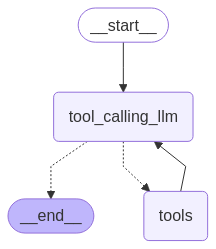

In [48]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [49]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_qbm7)
 Call ID: call_qbm7
  Args:
    query: recent AI news
  arxiv (call_gn33)
 Call ID: call_gn33
  Args:
    query: recent quantum computing research papers
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The latest AI news we announced in March - Google Blog", "url": "https://blog.google/technology/ai/google-ai-updates-march-2025/", "content": "The latest AI news we announced in March\n\nApr 04, 2025\n\n[[read-time]] min read\n\nHere’s a recap of some of our biggest AI updates from March, including Gemini 2.5 Pro, expanded access to AI Overviews, the release of AI Mode and more.\n\nGeneral summary [..